In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load house sales data

In [198]:
sales = pd.read_csv('home_data.csv')

In [199]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00000,1180,5650,1.00000,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000,3,2.25000,2570,7242,2.00000,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000,2,1.00000,770,10000,1.00000,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000,4,3.00000,1960,5000,1.00000,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000,3,2.00000,1680,8080,1.00000,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50000,1530,1131,3.00000,0,0,...,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50000,2310,5813,2.00000,0,0,...,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75000,1020,1350,2.00000,0,0,...,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000,3,2.50000,1600,2388,2.00000,0,0,...,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [200]:
sales.isna().sum() # No null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Explore

In [201]:
sales.info() # data types are appropriate for ML model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [202]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sales.price.groupby(sales.zipcode).describe().sort_values(by="mean")


,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98002,199.00000,234284.03518,52041.44866,95000.00000,199975.00000,235000.00000,268500.00000,389000.00000
98168,269.00000,240328.37175,69984.81876,78000.00000,199950.00000,235000.00000,285000.00000,600000.00000
98032,125.00000,251296.24000,64705.42645,85000.00000,221700.00000,249000.00000,285000.00000,545000.00000
98001,362.00000,280804.69061,98979.23009,100000.00000,215000.00000,260000.00000,319375.00000,850000.00000
98148,57.00000,284908.59649,89616.94015,105500.00000,240000.00000,278000.00000,319990.00000,600600.00000
98023,499.00000,286732.79158,108771.95939,86500.00000,224548.50000,268450.00000,316250.00000,1275000.00000
98188,136.00000,289078.34559,103106.57994,110000.00000,228750.00000,264000.00000,335000.00000,707000.00000
98003,280.00000,294111.27857,107597.66224,128000.00000,229000.00000,267475.00000,330000.00000,950000.00000
98030,256.00000,296187.98047,72808.09897,120000.00000,249712.50000,282255.00000,339912.50000,565000.00000


In [203]:
sales[(sales.zipcode<98200) & (sales.zipcode>98100) ].price.mean()  # Avg price in Seattle(Most expensive houses are in Seattle)

534963.7718614236

In [204]:
sales.corr()  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00000,-0.01676,0.00129,0.00516,-0.01226,-0.13211,0.01853,-0.00272,0.01159,-0.02378,0.00813,-0.01084,-0.00515,0.02138,-0.01691,-0.00822,-0.00189,0.02080,-0.00290,-0.13880
price,-0.01676,1.00000,0.30835,0.52514,0.70204,0.08966,0.25679,0.26637,0.39729,0.03636,0.66743,0.60557,0.32382,0.05401,0.12643,-0.05320,0.30700,0.02163,0.58538,0.08245
bedrooms,0.00129,0.30835,1.00000,0.51588,0.57667,0.03170,0.17543,-0.00658,0.07953,0.02847,0.35697,0.47760,0.30309,0.15418,0.01884,-0.15267,-0.00893,0.12947,0.39164,0.02924
bathrooms,0.00516,0.52514,0.51588,1.00000,0.75467,0.08774,0.50065,0.06374,0.18774,-0.12498,0.66498,0.68534,0.28377,0.50602,0.05074,-0.20387,0.02457,0.22304,0.56863,0.08718
sqft_living,-0.01226,0.70204,0.57667,0.75467,1.00000,0.17283,0.35395,0.10382,0.28461,-0.05875,0.76270,0.87660,0.43504,0.31805,0.05536,-0.19943,0.05253,0.24022,0.75642,0.18329
sqft_lot,-0.13211,0.08966,0.03170,0.08774,0.17283,1.00000,-0.00520,0.02160,0.07471,-0.00896,0.11362,0.18351,0.01529,0.05308,0.00764,-0.12957,-0.08568,0.22952,0.14461,0.71856
floors,0.01853,0.25679,0.17543,0.50065,0.35395,-0.00520,1.00000,0.02370,0.02944,-0.26377,0.45818,0.52388,-0.24570,0.48932,0.00634,-0.05912,0.04961,0.12542,0.27989,-0.01127
waterfront,-0.00272,0.26637,-0.00658,0.06374,0.10382,0.02160,0.02370,1.00000,0.40186,0.01665,0.08277,0.07207,0.08059,-0.02616,0.09288,0.03028,-0.01427,-0.04191,0.08646,0.03070
view,0.01159,0.39729,0.07953,0.18774,0.28461,0.07471,0.02944,0.40186,1.00000,0.04599,0.25132,0.16765,0.27695,-0.05344,0.10392,0.08483,0.00616,-0.07840,0.28044,0.07257
condition,-0.02378,0.03636,0.02847,-0.12498,-0.05875,-0.00896,-0.26377,0.01665,0.04599,1.00000,-0.14467,-0.15821,0.17410,-0.36142,-0.06062,0.00303,-0.01494,-0.10650,-0.09282,-0.00341


Using  filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

What fraction of the all houses have ‘sqft_living’ in this range?

In [205]:
sales2 = sales[(sales.sqft_living>2000) & (sales.sqft_living<4000) ]

In [206]:
len(sales2)/len(sales)

0.4215518437977143

In [207]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [208]:
X = sales[advanced_features]
y = sales.price

# Simple regression model that predicts price from square feet

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
sqft_model = LinearRegression()

In [213]:
sqft_model.fit(X_train, y_train)

LinearRegression()

In [214]:
y_pred = sqft_model.predict(X_test)

# Evaluate the quality of our model

In [215]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [216]:

R2_score = r2_score(y_test, y_pred)
R2_score

0.6994627079172886

In [217]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

208296.7287306048

# Explore model a little further

In [218]:
sqft_model.coef_

array([-3.43081488e+04,  4.03129768e+04,  1.12001375e+02,  9.91841252e-02,
        5.27153787e+03, -5.56358713e+02,  2.31460663e+04,  9.49081771e+04,
        5.43877197e+05,  5.50830557e+04,  7.22190667e+01,  3.97823082e+01,
       -2.59441855e+03,  2.19209736e+01,  5.95216325e+05, -1.96904654e+05,
        1.62077471e+01, -3.30430455e-01])

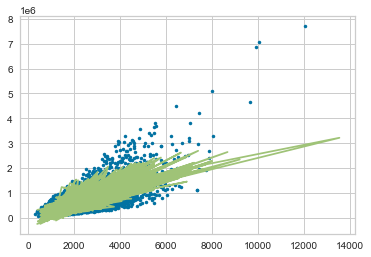

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train['sqft_living'],y_train,'.',
        X_test['sqft_living'],sqft_model.predict(X_test),'-')

# Explore other features of the data

In [220]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

# Build a model with these additional features

In [221]:
my_features_model= LinearRegression()

In [222]:
X2 = sales[my_features]
y2 = sales.price

In [223]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state =42)

In [224]:
my_features_model.fit(X_train2, y_train2)

LinearRegression()

In [225]:
y_pred2 = my_features_model.predict(X_test2)

In [226]:
R2_score2 = r2_score(y_test2, y_pred2)
R2_score2

0.505451265375346

In [227]:
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
rmse2

267200.83592434187

In [240]:
rmse2-rmse

58904.10719373706

# Compare simple model with more complex one

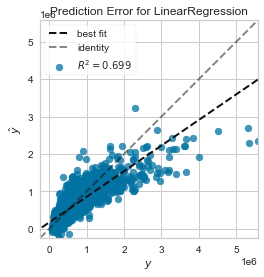

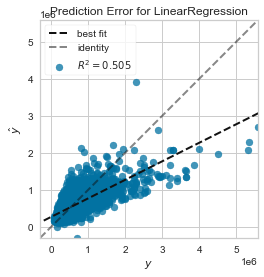

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [228]:

from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(sqft_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

model2 = LinearRegression()
visualizer2 = PredictionError(my_features_model)

visualizer2.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer2.score(X_test2, y_test2)  # Evaluate the model on the test data
visualizer2.show()

# Apply learned models to make predictions

In [229]:
house1 = sales[sales['id']==5309101200].drop("price", axis=1)

In [230]:
house1

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,4,2.25000,2400,5350,1.50000,0,0,4,7,1460,940,1929,0,98117,47.67630,-122.37000,1250,4880


<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [231]:
sqft_model.predict(house1[advanced_features])

array([670835.62017488])

## Prediction for a second house, a fancier one

In [232]:
house2 = sales[sales['id']==1925069082]

In [233]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25000,4640,22703,2.00000,1,4,...,8,2860,1780,1952,0,98052,47.63930,-122.09700,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [234]:
print (sqft_model.predict(house2[advanced_features]))

[1917447.65682911]


## Prediction for a super fancy home

In [235]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [236]:
bill = pd.DataFrame(bill_gates)
bill

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,8,25,50000,225000,4,98039,10,10,1,4,37500,12500,1994,2010,47.62761,-122.24205,5000,40000


In [239]:
sqft_model.predict(bill)

array([10981239.959445])